<div style="background-image: linear-gradient(to right, #4b4cff , #00d4ff); text-align: center; padding: 50px;">
  <h1 style="font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; font-size: 48px; color: white; text-shadow: 2px 2px #4b4cff;">
    DL - Seoul Bike Sharing
  </h1>
</div>

<h2 style="color:#009900; font-family: Arial, sans-serif; font-size: 28px; margin-top: 50px; font-weight: normal;  border-bottom: 2px solid #009900;">
Library
</h2>

In [336]:
import pandas as pd 
import numpy as np 

from sklearn.model_selection import train_test_split

import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from ucimlrepo import fetch_ucirepo 

from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

<h2 style="color:#009900; font-family: Arial, sans-serif; font-size: 28px; margin-top: 50px; font-weight: normal;  border-bottom: 2px solid #009900;">
Working and study on data
</h2>

In [337]:
# fetch dataset 
seoul_bike_sharing_demand = fetch_ucirepo(id=560) 
  
# data (as pandas dataframes) 
X = seoul_bike_sharing_demand.data.features
y = seoul_bike_sharing_demand.data.targets 
  
# metadata 
print(seoul_bike_sharing_demand.metadata) 
  
# variable information 
print(seoul_bike_sharing_demand.variables) 


{'uci_id': 560, 'name': 'Seoul Bike Sharing Demand', 'repository_url': 'https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand', 'data_url': 'https://archive.ics.uci.edu/static/public/560/data.csv', 'abstract': 'The dataset contains count of public bicycles rented per hour in the Seoul Bike Sharing System, with corresponding weather data and holiday information', 'area': 'Business', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 8760, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Functioning Day'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Mon Feb 05 2024', 'dataset_doi': '10.24432/C5F62R', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': 'Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and a

Here the website declines Functionnal days as the target of this dataset, so we bring this value back in our dataset in order to work with it.

In [338]:
X['Func Days'] = y

In [339]:
display(X)

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Func Days
0,1/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,1/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,1/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,1/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,1/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [340]:
display(X.describe())

,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


We gather informations about our dataset, we already know that there is :
 - 14 Variables 
 - 8760 inviduals
 - Apparently no missing values 

In [341]:
fig_bikes = px.histogram(X, x='Rented Bike Count',
                          title='Distribution of Rented Bike Count',
                          labels={'Rented Bike Count': 'Number of Bikes Rented'})
fig_bikes.show()

fig_season = px.box(X, x='Seasons', y='Rented Bike Count',
                    title='Rented Bike Count by Season',
                    labels={'Seasons': 'Season', 'Rented Bike Count': 'Number of Bikes Rented'})
fig_season.show()

fig_holiday = px.box(X, x='Holiday', y='Rented Bike Count',
                     title='Rented Bike Count by Holiday',
                     labels={'Holiday': 'Holiday', 'Rented Bike Count': 'Number of Bikes Rented'})
fig_holiday.show()


We use those few plots to try to understand the time impact on our target. We can see the impact of seasons and holiday on the amount of rented bike. \
As expected in winter less bike are rented due to weather. \
We can also look at the few days when it happened to be snowing and look at the small amour of rented bike that day or when the solar radiation hit his peak value.

In [342]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=X['Date'], y=X['Rented Bike Count'],
                         mode='lines',
                         name='Rented Bike Count',
                         line=dict(color='blue')))

fig.add_trace(go.Scatter(x=X['Date'], y=X['Temperature'],
                         mode='lines',
                         name='Temperature (°C)',
                         line=dict(color='red'),
                         yaxis="y2"))

fig.update_layout(
    title='Bike Rentals and Temperature Over Time',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Rented Bike Count', titlefont=dict(color='blue'), tickfont=dict(color='blue')),
    yaxis2=dict(title='Temperature (°C)', titlefont=dict(color='red'), tickfont=dict(color='red'),
                overlaying='y', side='right')
)

fig.show()

Here we highlight the temperature and the amount of rented bike in this graphic. We can see that there is less rented bike in the summer when the temperature are higher. That can also mean that the city of Seoul rent less bike in the summer because people leave for the vacation. The biggest pick is monitored right before the summer, when the temperature are around 25°C.

/var/folders/zw/lt6wh5k91_gg7d4sfkvd9m180000gn/T/ipykernel_21938/5825072.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



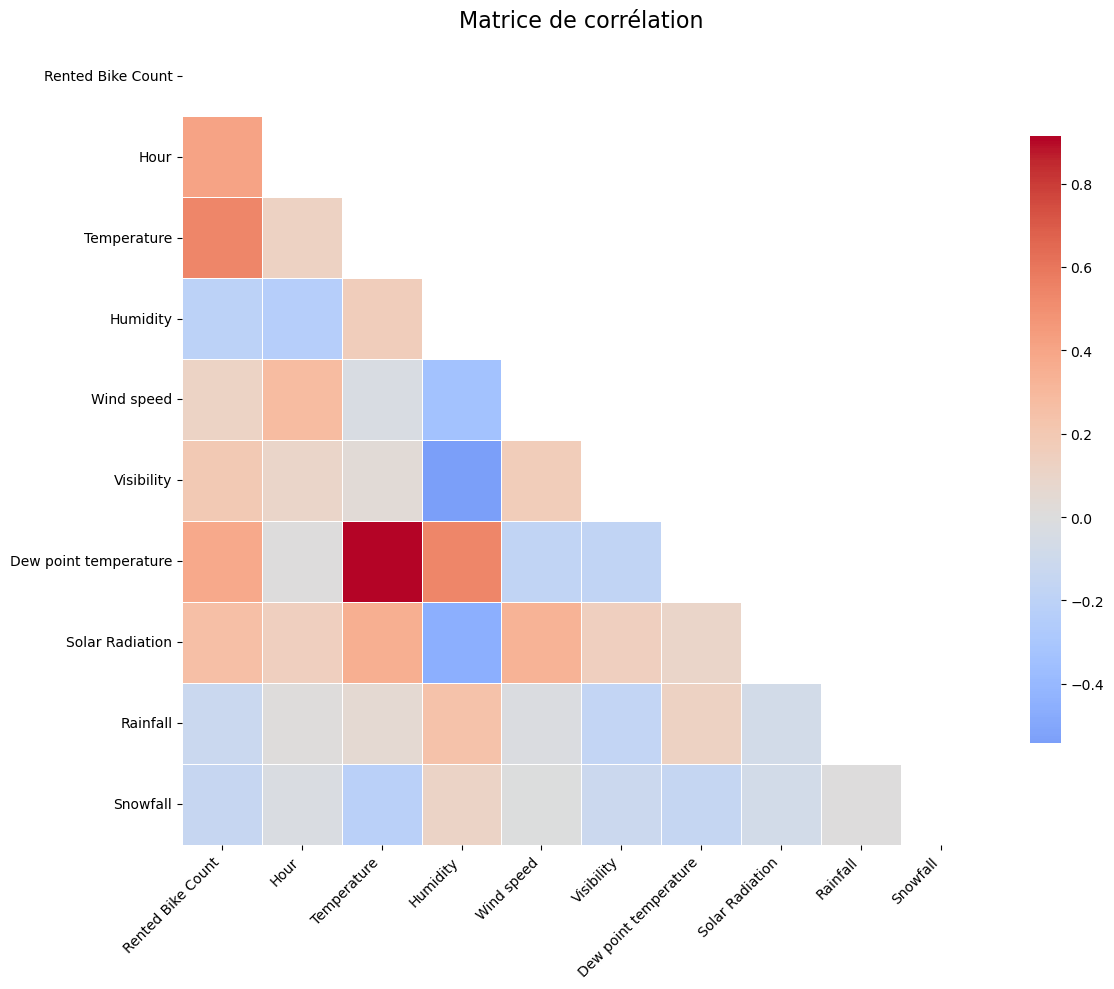

In [343]:
correlation_matrix = X.corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(12, 10))

sns.heatmap(correlation_matrix, annot=False, mask=mask, cmap='coolwarm', 
            center=0, linewidths=0.5, cbar_kws={"shrink": 0.75})

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title('Matrice de corrélation', size=16)
plt.tight_layout()  
plt.show()

Variable Units : 
- Temperature -> °C
- Humidity -> %
- Wind speed -> m/s
- Visibility -> 10m
- Dew point temperature -> °C
- Solar Radiation -> Mj/m2
- Rainfall -> mm

Humidity and Temperature seems to be correlated and they also seems to be the 2 most important variable to explain the 'Rented Bike Count'. This interpretation seems to be very likely to happens becasue renting a bike depends a lot on the weather, but this isn't linear(Number of rented bike don't go up as soon as is it 20°C outside).



We can already see that we will have too make some adjustements on some variables, such as One Hot Encoding and LabelEncoder. And we transform the column date into a datetime format.

We will use : 
$$Hour_{sin} = sin(\frac{2\pi*Hour}{24})$$
$$Hour_{cos} = cos(\frac{2\pi*Hour}{24})$$
Cyclical transformation with sin and cos to highlight the fact that midnight and 11PM are adjacent.

In [344]:
#Label encoding
X['Holiday'] = X['Holiday'].map({'No Holiday': 0, 'Holiday': 1})
X['Func Days'] = X['Func Days'].map({'No': 0, 'Yes': 1})

#One hot Encoding
X = pd.get_dummies(X, columns=['Seasons'], prefix='Season', drop_first=False)

X['Date'] = pd.to_datetime(X['Date'], format='%d/%m/%Y') 
X['DayofWeek'] = X['Date'].dt.dayofweek
X['Year'] = X['Date'].dt.year
X['Month'] = X['Date'].dt.month
X['Day'] = X['Date'].dt.day

#We used the Date column so we take it away
X = X.drop('Date', axis=1)

#Cyclical transformation hour
X['Hour_cos'] = np.cos(2 * np.pi * X['Hour']/24)
X['Hour_sin'] = np.sin(2 * np.pi * X['Hour']/24)
X = X.drop('Hour', axis=1)

#Cyclical Transformation for year day
X['DayYEAR_cos'] = np.cos(2 * np.pi * X['Day']/365)
X['DayYEAR_sin'] = np.sin(2 * np.pi * X['Day']/365)

X['DayWeek_cos'] = np.cos(2 * np.pi * X['DayofWeek']/7)
X['DayWeek_sin'] = np.sin(2 * np.pi * X['DayofWeek']/7)

X['Month_cos'] = np.cos(2 * np.pi * X['Month']/12)
X['Month_sin'] = np.sin(2 * np.pi * X['Month']/12)

#Drop those columns
X = X.drop(['Month','Day','DayofWeek'], axis=1)
display(X)

,Rented Bike Count,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Holiday,...,Season_Winter,Year,Hour_cos,Hour_sin,DayYEAR_cos,DayYEAR_sin,DayWeek_cos,DayWeek_sin,Month_cos,Month_sin
0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,...,1,2017,1.000000,0.000000,0.999852,0.017213,-0.900969,-0.433884,1.000000,-2.449294e-16
1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,...,1,2017,0.965926,0.258819,0.999852,0.017213,-0.900969,-0.433884,1.000000,-2.449294e-16
2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,...,1,2017,0.866025,0.500000,0.999852,0.017213,-0.900969,-0.433884,1.000000,-2.449294e-16
3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,...,1,2017,0.707107,0.707107,0.999852,0.017213,-0.900969,-0.433884,1.000000,-2.449294e-16
4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,...,1,2017,0.500000,0.866025,0.999852,0.017213,-0.900969,-0.433884,1.000000,-2.449294e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,0,...,0,2018,0.258819,-0.965926,0.869589,0.493776,-0.900969,-0.433884,0.866025,-5.000000e-01
8756,764,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,0,...,0,2018,0.500000,-0.866025,0.869589,0.493776,-0.900969,-0.433884,0.866025,-5.000000e-01
8757,694,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,0,...,0,2018,0.707107,-0.707107,0.869589,0.493776,-0.900969,-0.433884,0.866025,-5.000000e-01
8758,712,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,0,...,0,2018,0.866025,-0.500000,0.869589,0.493776,-0.900969,-0.433884,0.866025,-5.000000e-01


<h2 style="color:#009900; font-family: Arial, sans-serif; font-size: 28px; margin-top: 50px; font-weight: normal;  border-bottom: 2px solid #009900;">
Training and Test Set
</h2>

In [345]:
y = X.pop('Rented Bike Count') 
 
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Deep Learning Model

Here is my first try to work on the data with a simple model, I train the model and then I look for the mean absolute error to evaluate my model

In [346]:
#Model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

#Training
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=32, verbose=1)

loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Mean Absolute Error: {mae}")

Epoch 1/200
219/219 [==============================] - 0s 727us/step - loss: 685700.8125 - mae: 583.8279 - val_loss: 235968.6562 - val_mae: 342.3277
Epoch 2/200
219/219 [==============================] - 0s 481us/step - loss: 174349.0625 - mae: 294.6192 - val_loss: 171451.1719 - val_mae: 284.5522
Epoch 3/200
219/219 [==============================] - 0s 456us/step - loss: 148095.3906 - mae: 264.6354 - val_loss: 157850.9219 - val_mae: 269.4631
Epoch 4/200
219/219 [==============================] - 0s 455us/step - loss: 137416.0625 - mae: 250.4413 - val_loss: 148117.7812 - val_mae: 255.1749
Epoch 5/200
219/219 [==============================] - 0s 474us/step - loss: 129978.3281 - mae: 240.6761 - val_loss: 139579.0000 - val_mae: 247.7937
Epoch 6/200
219/219 [==============================] - 0s 461us/step - loss: 122637.3594 - mae: 232.7669 - val_loss: 131721.7656 - val_mae: 241.7753
Epoch 7/200
219/219 [==============================] - 0s 470us/step - loss: 115589.8984 - mae: 224.4510 -

In [347]:
model.summary()

Model: "sequential_250"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1017 (Dense)          (None, 64)                1536      
                                                                 
 dense_1018 (Dense)          (None, 32)                2080      
                                                                 
 dense_1019 (Dense)          (None, 16)                528       
                                                                 
 dense_1020 (Dense)          (None, 1)                 17        
                                                                 
Total params: 4,161
Trainable params: 4,161
Non-trainable params: 0
_________________________________________________________________


-	We use KFold to perform cross-validation on the data we created. We aim to obtain the mean absolute error (MAE) for each architecture, so we build several architectures in order to find the one that best suits our problem.

-	For each architecture, we initialize a sequential model built with *Dense* layers followed by *Dropout* layers for regularization. We add a final *Dense*(1) layer because we are working on a regression task. After compiling the model, we calculate the mean absolute error.

-	After obtaining the MAE for all architectures, we identify the best one using **argmin(mae_scores)** (the one with the lowest MAE). Now that we have the best architecture, we create the model and evaluate it using the residuals, standard deviation, and the sigma values (1, 2, and 3) to highlight the precision of the confidence intervals.

In [348]:
kf = KFold(n_splits=5, shuffle=True)
mae_scores = []

architectures = [
    [64, 32],  
    [128, 64, 32],  
    [128, 128, 64, 32, 16],
]

for arch in architectures:
    fold_mae = []  # Get our score for each iteration 
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        # Model with the previous architecture selection
        model = Sequential()
        for units in arch:
            model.add(Dense(units, activation='relu'))
            model.add(Dropout(0.3))
        model.add(Dense(1)) 
        
        model.compile(optimizer='adam', loss='mse', metrics=['mae'])
        
        # Training without validation data
        history = model.fit(X_train, y_train, epochs=200, batch_size=32, verbose=0)
        
        # Rating
        predictions = model.predict(X_test)
        fold_mae.append(mean_absolute_error(y_test, predictions))
    
    mae_scores.append(np.mean(fold_mae))

# Best Architecture
optimal_architecture = architectures[np.argmin(mae_scores)]
print(f"Optimal Architecture: {optimal_architecture}")

model = Sequential()
for units in optimal_architecture:
    model.add(Dense(units, activation='relu'))
    model.add(Dropout(0.3))
model.add(Dense(1))  # Linear output
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
history = model.fit(X_train, y_train, epochs=200, batch_size=32, verbose=0)

predictions = model.predict(X_test).flatten()
errors = y_test - predictions
sigma = np.std(errors)

# Sigmas
within_1_sigma = np.mean(np.abs(errors) <= sigma)
within_2_sigma = np.mean(np.abs(errors) <= 2 * sigma)
within_3_sigma = np.mean(np.abs(errors) <= 3 * sigma)

print(f"Predictions within 1 sigma: {within_1_sigma * 100:.2f}%")
print(f"Predictions within 2 sigma: {within_2_sigma * 100:.2f}%")
print(f"Predictions within 3 sigma: {within_3_sigma * 100:.2f}%")

55/55 [==============================] - 0s 579us/step
Optimal Architecture: [128, 128, 64, 32, 16]
55/55 [==============================] - 0s 501us/step
Predictions within 1 sigma: 80.25%
Predictions within 2 sigma: 93.55%
Predictions within 3 sigma: 98.12%


Function to draw error loss and val loss.

In [349]:
def plot_training_history(history):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['mae'], label='Training MAE')
    plt.title('MAE')
    plt.xlabel('Epoch')
    plt.ylabel('MAE')
    plt.legend()

    plt.tight_layout()
    plt.show()

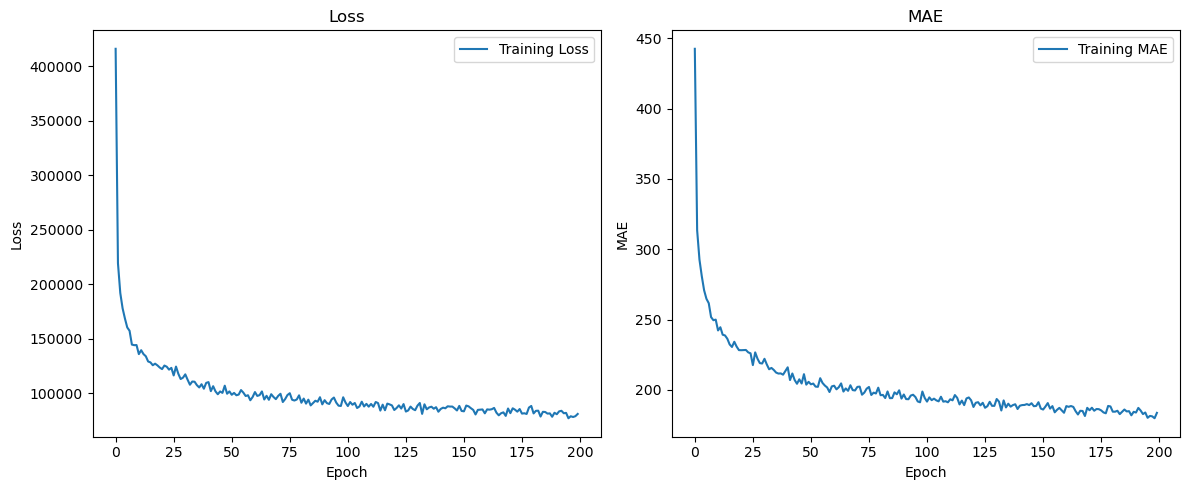

In [350]:
plot_training_history(history)

In [351]:
kf = KFold(n_splits=5, shuffle=True)
mae_scores = []

architectures = [
    [64, 32],  
    [128, 64, 32],  
    [128, 128, 64, 32, 16],
]

for arch in architectures:
    fold_mae = []  #get our score for each iteration 
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        # Model with the previous architecture selection
        model = Sequential()
        for units in arch:
            model.add(Dense(units, activation='relu'))
            model.add(Dropout(0.3))
        model.add(Dense(1)) 
        
        model.compile(optimizer='adam', loss='mse', metrics=['mae'])
        
        # Training
        early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
        # If the performance of the model don't increase for 10 epochs we stop the training of this model (early stopping) use to prevent overfitting
        history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=32, verbose=0, callbacks=[early_stop])
        
        # Rating
        predictions = model.predict(X_test)
        fold_mae.append(mean_absolute_error(y_test, predictions))
    
    mae_scores.append(np.mean(fold_mae))

# Best Architecture
optimal_architecture = architectures[np.argmin(mae_scores)]
print(f"Architecture optimale: {optimal_architecture}")

model = Sequential()
for units in optimal_architecture:
    model.add(Dense(units, activation='relu'))
    model.add(Dropout(0.3))
model.add(Dense(1))  # Sortie linéaire
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=32, verbose=0, callbacks=[early_stop])

predictions = model.predict(X_test).flatten()
errors = y_test - predictions
sigma = np.std(errors)

# Sigmas
within_1_sigma = np.mean(np.abs(errors) <= sigma)
within_2_sigma = np.mean(np.abs(errors) <= 2 * sigma)
within_3_sigma = np.mean(np.abs(errors) <= 3 * sigma)

print(f"Predictions within 1 sigma: {within_1_sigma * 100:.2f}%")
print(f"Predictions within 2 sigma: {within_2_sigma * 100:.2f}%")
print(f"Predictions within 3 sigma: {within_3_sigma * 100:.2f}%")

55/55 [==============================] - 0s 293us/step
Architecture optimale: [128, 64, 32]
55/55 [==============================] - 0s 256us/step
Predictions within 1 sigma: 81.85%
Predictions within 2 sigma: 93.84%
Predictions within 3 sigma: 97.43%


We utilize a validation set to enhance our model’s ability to generalize effectively. By assessing the model’s performance on this separate dataset, we can identify potential issues such as overfitting and make necessary adjustments to improve its robustness.

In [352]:
def plot_training_history(history):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['mae'], label='Training MAE')
    plt.plot(history.history['val_mae'], label='Validation MAE')
    plt.title('MAE')
    plt.xlabel('Epoch')
    plt.ylabel('MAE')
    plt.legend()

    plt.tight_layout()
    plt.show()

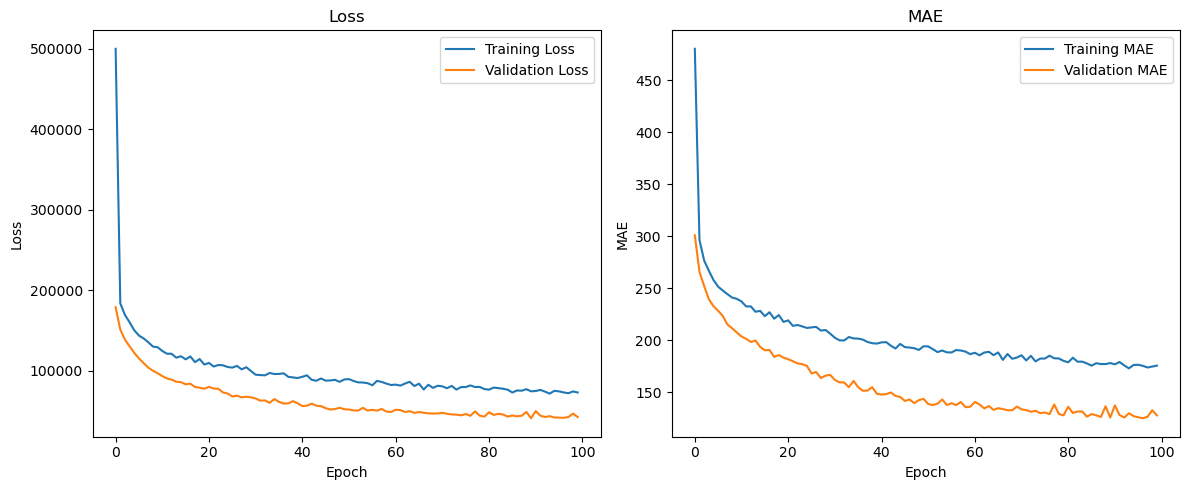

In [353]:
plot_training_history(history)

$\sigma_1 = \text{std}(errors)$

$\sigma_2 = 2 \cdot \text{std}(errors)$

$\sigma_3 = 3 \cdot \text{std}(errors)$

    with *std(errors)* being the standard deviation of errors